In [38]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.special import comb
from geomstats.geometry.hyperbolic import Hyperbolic

# In $R^3$ 

In [3]:
# Lorentz inner product
def lpd(x,y):
    n = len(x)
    gg = np.eye(n)
    gg[0,0] = -1
    return x.T@gg@y

# Exponential Map
def expmap(mu, u):
    if round(lpd(mu,mu),6) != -1:
        return 'Input 1 is Not on the Hyperbolic space'
    if lpd(mu,u) != 0:
        return 'Input 2 is Not a Tangent vector'
    return np.cosh(np.sqrt(lpd(u,u)))*mu + np.sinh(np.sqrt(lpd(u,u)))*u/np.sqrt(lpd(u,u))

# Logarithm Map
def logmap(mu,z):
    if round(lpd(mu,mu),6) != -1 or round(lpd(z,z),6) != -1:
        return 'Input is Not on the Hyperbolic space'    
    a = -lpd(mu,z)
    return np.arccosh(a)/np.sqrt(a**2 -1)*(z - a*mu)

# Geodesic
def geodesics(a,b,t):
    if round(lpd(a,a),6) != -1 or round(lpd(b,b),6) != -1:
        return 'Input is Not on the Hyperbolic space'
    u = logmap(a,b)
    return np.cosh(t*np.sqrt(lpd(u,u)))*a + np.sinh(t*np.sqrt(lpd(u,u)))*u/np.sqrt(lpd(u,u))

mu0 = np.array([1,0,0])

In [3]:
a = np.array([1,2,3])
b = np.array([4,5,6])
lpd(a,b)

24.0

In [4]:
mu0 = np.array([3,0,0])
u = np.array([1,2,2])

expmap(mu0,u)

'Input 1 is Not on the Hyperbolic space'

In [6]:
mu0 = np.array([1,0,0])
z = np.array([3,2,2])

lpd(logmap(mu0,z), mu0)

0.0

In [6]:
np.arccosh(3)/np.sqrt(8)*2

1.246450480280461

In [7]:
c = geodesics(mu0,z,1/2)
round(lpd(c,c),6) == -1

True

### Compare

In [8]:
np.random.seed(1000)

mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (300,), 'raise')

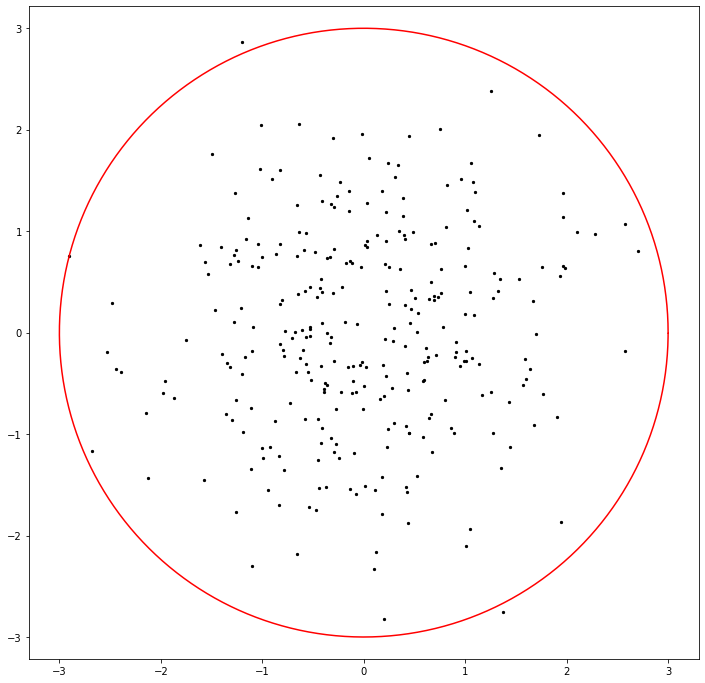

In [9]:
plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'black', s = 5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')
plt.axis('equal')

plt.show()

### Two points case 

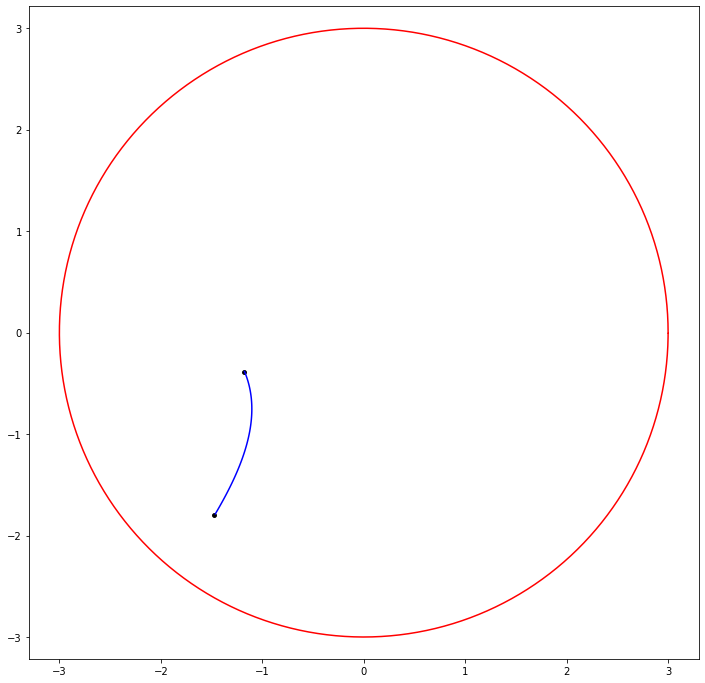

In [10]:
np.random.seed(1010)

# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (2,), 'raise')

plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'black', s = 15)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
u_ = np.hstack((np.zeros((2,1)), u))
u_

z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])
t = np.arange(0,1,0.01)
nn = len(t)
x1 = np.zeros(nn)
y1 = np.zeros(nn)

for k in range(nn):
    x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
    y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
plt.plot(x1,y1, c = 'blue')

plt.axis('equal')

plt.show()

## Zero-mean Case
### More points case 

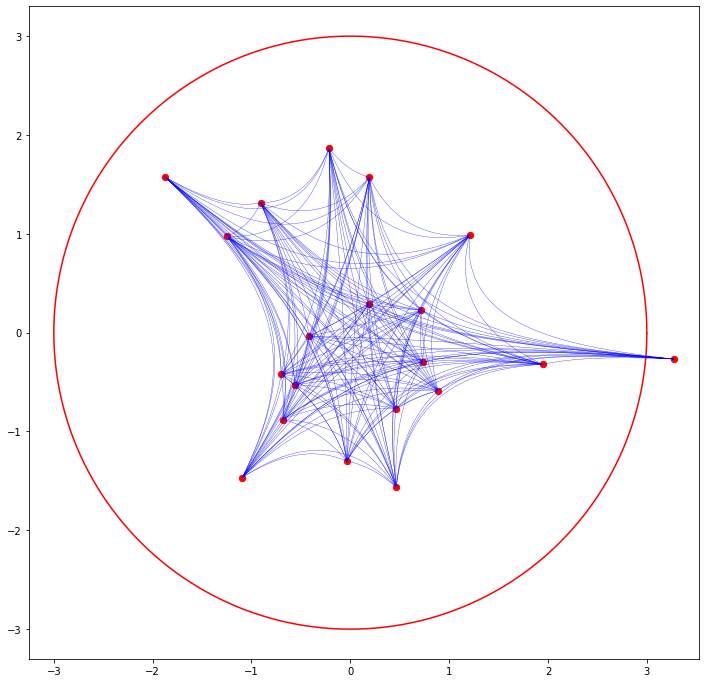

In [11]:
np.random.seed(1100)

num = 20

# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(u[:, 0], u[:, 1], c= 'red', s = 40)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
nchs2 = int(comb(num,2))
index = list(combinations(range(num),2))

for i in range(nchs2):
    u_ = np.hstack((np.zeros((2,1)), u[index[i],:]))
    z1 = expmap(mu0, u_[0,:])
    z2 = expmap(mu0, u_[1,:])
    t = np.arange(0,1,0.01)
    nn = len(t)
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)

    for k in range(nn):
        x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
        y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
    plt.plot(x1,y1, c = 'blue', linewidth=0.3)


# u_ = np.hstack((np.zeros((2,1)), u))
# u_

plt.axis('equal')

plt.show()

### Recursive estimate in tangent space 

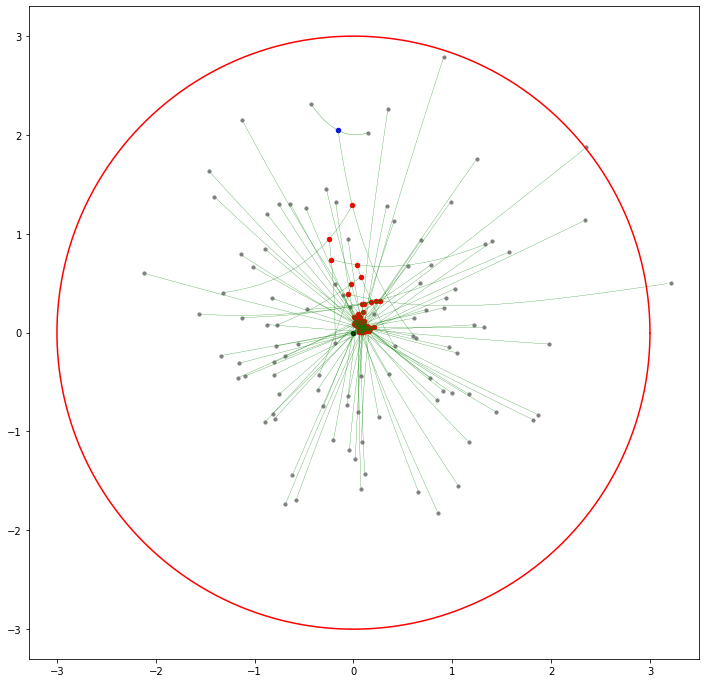

In [5]:
np.random.seed(120)
num = 100


# 1. Scatter Plot
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(0,0, c = 'black', s = 20)
plt.scatter(u[:, 0], u[:, 1], c= 'gray', s = 10)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
u_ = np.hstack((np.zeros((num,1)), u))
v_ = np.zeros((num-1, 3))
z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])
mid = logmap(mu0, geodesics(z1, z2, 0.5))
v_[0, :] = mid

t = np.arange(0, 1, 0.01)
nn = len(t)
x1 = np.zeros(nn)
y1 = np.zeros(nn)

for k in range(nn):
    x1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[1]
    y1[k] = logmap(mu0,geodesics(z1, z2, t[k]))[2]
    
plt.plot(x1,y1, c = 'green', linewidth = 0.3)
v_[0,:] = logmap(mu0, geodesics(z1, z2, 0.5))
x_, y_ = v_[0,1:]
plt.scatter(x_,y_, c = 'blue', s = 20)

for i in range(1, num - 1):
    z1 = expmap(mu0, v_[i-1,:])
    z2 = expmap(mu0, u_[i+1,:])
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)
    
    for k in range(nn):
        x1[k] = logmap(mu0, geodesics(z1, z2, t[k]))[1]
        y1[k] = logmap(mu0, geodesics(z1, z2, t[k]))[2]
        
    plt.plot(x1,y1, c = 'green', linewidth = 0.25)
    v_[i,:] = logmap(mu0, geodesics(z1, z2, 1/(i+2)))
    x_, y_ = v_[i,1:]
    plt.scatter(x_,y_, c = 'red', s = 20)
    
    
plt.axis('equal')

plt.show()

0.0582873432593396

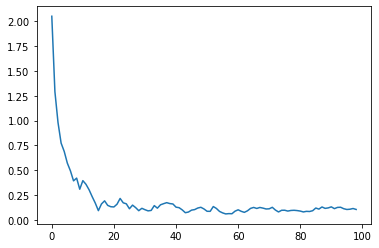

In [13]:
v = v_[:,1:]

plt.plot(np.linalg.norm(v, ord = 2, axis = 1))

np.min(np.linalg.norm(v, ord = 2, axis = 1))

### Compare the length between $\|v_n\|$ and $\|\bar u_n\|$

In [71]:
# np.random.seed(120)
num = 10000

# 1. Samples
mean = np.zeros(2)
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


# 3. Geodesic plot
u_ = np.hstack((np.zeros((num,1)), u))
v_ = np.zeros((num-1, 3))
z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])

v_[0,:] = logmap(mu0, geodesics(z1, z2, 0.5))

for i in range(1, num - 1):
    z1 = expmap(mu0, v_[i-1,:])
    z2 = expmap(mu0, u_[i+1,:])

    v_[i,:] = logmap(mu0, geodesics(z1, z2, 1/(i+2)))
    

u_mean = np.mean(u, axis= 0)
print(u_mean.shape)

np.linalg.norm(u_mean) >= np.linalg.norm(v_[-1,1:])

(2,)


True

In [70]:
print(np.linalg.norm(v_[-1,1:]))
print(np.linalg.norm(u_mean))

0.00454010917974628
0.0074889946199454775


## Non-zero mean case

In [4]:
# Rewrite geodesics
def geodesics_(a,b,t):
    model = Hyperbolic(len(a) - 1)
    u = model.metric.log(b,a)
    return np.cosh(t*np.sqrt(model.metric.inner_product(u,u)))*a + np.sinh(t*np.sqrt(model.metric.inner_product(u,u)))*u/np.sqrt(model.metric.inner_product(u,u))

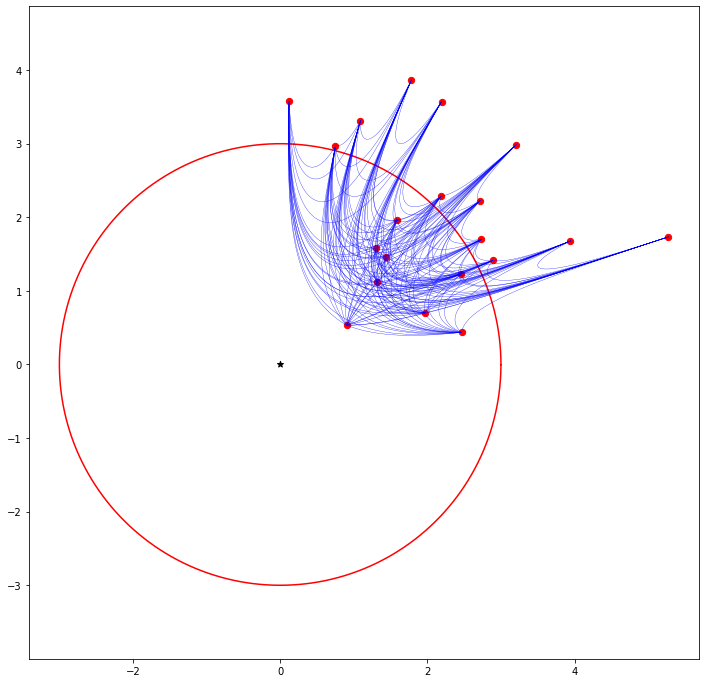

In [15]:
np.random.seed(1100)

num = 20
mu0 = np.array([1,0,0])

# 1. Scatter Plot
mean = np.array([2,2])
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(0,0, c = 'black', s = 40, marker="*")
plt.scatter(u[:, 0], u[:, 1], c= 'red', s = 40)
plt.xlim(-10, 10)
plt.ylim(-10, 10)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
nchs2 = int(comb(num,2))
index = list(combinations(range(num),2))
hb = Hyperbolic(2)

for i in range(nchs2):
    u_ = np.hstack((np.zeros((2,1)), u[index[i],:]))
    z1 = hb.metric.exp(u_[0,:], mu0)
    z2 = hb.metric.exp(u_[1,:], mu0)
    t = np.arange(0,1,0.01)
    nn = len(t)
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)

    for k in range(nn):
        x1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[1]
        y1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[2]
    
    plt.plot(x1,y1, c = 'blue', linewidth=0.3)


# u_ = np.hstack((np.zeros((2,1)), u))
# u_

plt.axis('equal')

plt.show()

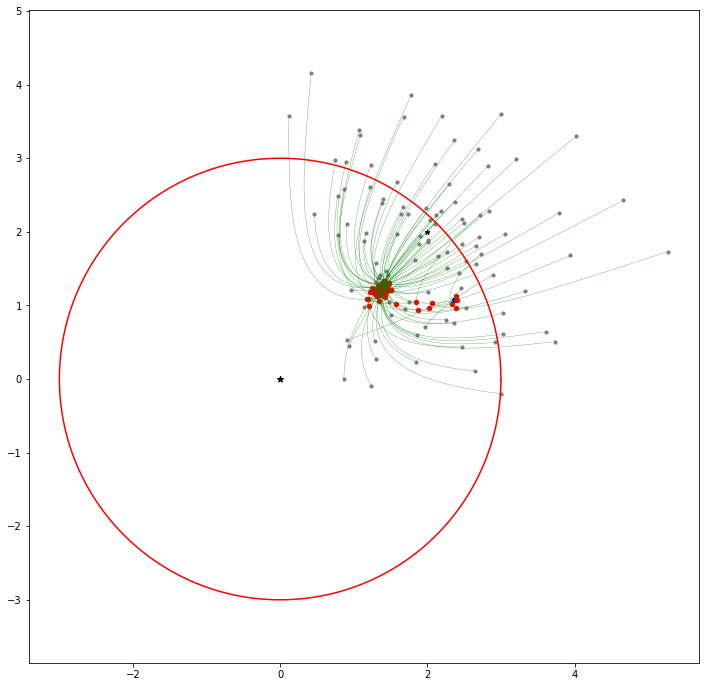

In [17]:
np.random.seed(1100)
num = 100


# 1. Scatter Plot
mean = np.array([2,2])
cov = np.eye(2)
u = np.random.multivariate_normal(mean, cov, (num,), 'raise')


plt.figure(figsize = (12,12))
plt.scatter(0,0, c = 'black', s = 40, marker="*")
plt.scatter(mean[0],mean[1], c = 'black', s = 25, marker="*")
plt.scatter(u[:, 0], u[:, 1], c= 'gray', s = 10)
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# 2. Circle Plot
r = 3
theta = np.arange(0, 2*np.pi, 0.01)
x = r * np.cos(theta)
y = r * np.sin(theta)

plt.plot(x,y, c = 'red')

# 3. Geodesic plot
hb = Hyperbolic(2)

u_ = np.hstack((np.zeros((num,1)), u))
v_ = np.zeros((num-1, 3))
z1 = hb.metric.exp(u_[0,:],mu0)
z2 = hb.metric.exp(u_[1,:],mu0)
mid = hb.metric.log(geodesics_(z1, z2, 0.5), mu0)
v_[0, :] = mid

t = np.arange(0, 1, 0.01)
nn = len(t)
x1 = np.zeros(nn)
y1 = np.zeros(nn)

for k in range(nn):
    x1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[1]
    y1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[2]
    
plt.plot(x1,y1, c = 'green', linewidth = 0.3)
v_[0,:] = hb.metric.log(geodesics_(z1, z2, 0.5), mu0)
x_, y_ = v_[0,1:]
plt.scatter(x_,y_, c = 'blue', s = 20)

for i in range(1, num - 1):
    z1 = hb.metric.exp(v_[i-1,:], mu0)
    z2 = hb.metric.exp(u_[i+1,:], mu0)
    x1 = np.zeros(nn)
    y1 = np.zeros(nn)
    
    for k in range(nn):
        x1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[1]
        y1[k] = hb.metric.log(geodesics_(z1, z2, t[k]), mu0)[2]
        
    plt.plot(x1,y1, c = 'green', linewidth = 0.25)
    v_[i,:] = hb.metric.log(geodesics_(z1, z2, 1/(i+2)), mu0)
    x_, y_ = v_[i,1:]
    plt.scatter(x_,y_, c = 'red', s = 20)
    
    
plt.axis('equal')

plt.show()

# General case

## Identity Covariance Matrix

In [4]:
def verify(num, dim):
    mu0 = np.zeros(dim + 1)
    mu0[0] = 1

    mean = np.zeros(dim)
    cov = np.eye(dim)
    u = np.random.multivariate_normal(mean, cov, (num,), 'raise')

    # 3. Geodesic plot
    u_ = np.hstack((np.zeros((num,1)), u))
    v_ = np.zeros((num-1, dim + 1))
    z1 = expmap(mu0, u_[0,:])
    z2 = expmap(mu0, u_[1,:])

    v_[0,:] = logmap(mu0, geodesics(z1, z2, 0.5))

    for i in range(1, num - 1):
        z1 = expmap(mu0, v_[i-1,:])
        z2 = expmap(mu0, u_[i+1,:])

        v_[i,:] = logmap(mu0, geodesics(z1, z2, 1/(i+2)))
    
    u_mean = np.mean(u, axis= 0)

    return 1*(np.linalg.norm(u_mean) >= np.linalg.norm(v_[-1,1:]))

reps = 100

In [9]:
dim_ = 2
print('--------------------------------------')
print('Dimension of Hyperbolic Space: ', dim_)
print('--------------------------------------')

nums = [100,200,500,800]
for j in nums:
    res = np.zeros(reps)
    for i in range(reps):
        res[i] = verify(j, dim_)
    print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  2
--------------------------------------
The ave prob when sample size is 100 is 0.8
The ave prob when sample size is 200 is 0.83
The ave prob when sample size is 500 is 0.84
The ave prob when sample size is 800 is 0.91




In [8]:
dim_ = 3
print('--------------------------------------')
print('Dimension of Hyperbolic Space: ', dim_)
print('--------------------------------------')

nums = [100,200,500,800]
for j in nums:
    res = np.zeros(reps)
    for i in range(reps):
        res[i] = verify(j, dim_)
    print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  3
--------------------------------------
The ave prob when sample size is 100 is 0.98
The ave prob when sample size is 200 is 0.91
The ave prob when sample size is 500 is 0.94
The ave prob when sample size is 800 is 0.96




In [5]:
dim_ = 4
print('--------------------------------------')
print('Dimension of Hyperbolic Space: ', dim_)
print('--------------------------------------')

nums = [100,200,500,800]
for j in nums:
    res = np.zeros(reps)
    for i in range(reps):
        res[i] = verify(j, dim_)
    print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  4
--------------------------------------
The ave prob when sample size is 100 is 0.93
The ave prob when sample size is 200 is 0.95
The ave prob when sample size is 500 is 0.95
The ave prob when sample size is 800 is 0.96




In [6]:
dim_ = 5
print('--------------------------------------')
print('Dimension of Hyperbolic Space: ', dim_)
print('--------------------------------------')

nums = [100,200,500,800]
for j in nums:
    res = np.zeros(reps)
    for i in range(reps):
        res[i] = verify(j, dim_)
    print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  5
--------------------------------------
The ave prob when sample size is 100 is 0.97
The ave prob when sample size is 200 is 0.98
The ave prob when sample size is 500 is 0.96
The ave prob when sample size is 800 is 0.99




In [7]:
dim_ = 6
print('--------------------------------------')
print('Dimension of Hyperbolic Space: ', dim_)
print('--------------------------------------')

nums = [100,200,500,800]
for j in nums:
    res = np.zeros(reps)
    for i in range(reps):
        res[i] = verify(j, dim_)
    print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  6
--------------------------------------
The ave prob when sample size is 100 is 0.98
The ave prob when sample size is 200 is 0.98
The ave prob when sample size is 500 is 1.0
The ave prob when sample size is 800 is 0.97




## General Covariance Matrix

In [11]:
def verify_(num, dim):
    mu0 = np.zeros(dim + 1)
    mu0[0] = 1

    mean = np.zeros(dim)
    A = np.random.rand(dim, dim)
    cov = A@A.T # Totally random covariance matrix
    u = np.random.multivariate_normal(mean, cov, (num,), 'raise')

    # 3. Geodesic plot
    u_ = np.hstack((np.zeros((num,1)), u))
    v_ = np.zeros((num-1, dim + 1))
    z1 = expmap(mu0, u_[0,:])
    z2 = expmap(mu0, u_[1,:])

    v_[0,:] = logmap(mu0, geodesics(z1, z2, 0.5))

    for i in range(1, num - 1):
        z1 = expmap(mu0, v_[i-1,:])
        z2 = expmap(mu0, u_[i+1,:])

        v_[i,:] = logmap(mu0, geodesics(z1, z2, 1/(i+2)))
    
    u_mean = np.mean(u, axis= 0)

    return 1*(np.linalg.norm(u_mean) >= np.linalg.norm(v_[-1,1:]))

reps = 100


In [2]:
dimList = [5, 6, 7, 8, 9, 10]

for dim_ in dimList:
    print('--------------------------------------')
    print('Dimension of Hyperbolic Space: ', dim_)
    print('--------------------------------------')

    nums = [100,200,500,800]
    for j in nums:
        res = np.zeros(reps)
        for i in range(reps):
            res[i] = verify_(j, dim_)
        print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

    print('\n')

--------------------------------------
Dimension of Hyperbolic Space:  5
--------------------------------------


NameError: name 'np' is not defined

In [18]:
num = 100
dim = 5

mu0 = np.zeros(dim + 1)
mu0[0] = 1

mean = np.zeros(dim)
A = np.random.rand(dim, dim)
cov = A@A.T

u = np.random.multivariate_normal(mean, cov, (num,), 'raise')

u_ = np.hstack((np.zeros((num,1)), u))
v_ = np.zeros((num-1, dim + 1))
z1 = expmap(mu0, u_[0,:])
z2 = expmap(mu0, u_[1,:])

print('1')


# Proceed with GEOMSTAT

In [1]:
# Rewrite geodesics
def geodesics_(a,b,t):
    model = Hyperbolic(len(a) - 1)
    u = model.metric.log(b,a)
    return np.cosh(t*np.sqrt(model.metric.inner_product(u,u)))*a + np.sinh(t*np.sqrt(model.metric.inner_product(u,u)))*u/np.sqrt(model.metric.inner_product(u,u))

In [8]:
def verify_(num, dim, tt):
    hb = Hyperbolic(dim)
    mu0 = np.zeros(dim + 1)
    mu0[0] = 1

    mean = np.zeros(dim)

    # Different Type of covariance matrix
    if tt == 1:
        cov = np.eye(dim)
    elif tt == 2:
        cov = 0.5*np.ones((dim,dim)) + 0.5*np.eye(dim)
    elif tt == 3:
        A = np.random.rand(dim,dim)
        cov = A@A.T


    u = np.random.multivariate_normal(mean, cov, (num,), 'raise')

    # 3. Geodesic plot
    u_ = np.hstack((np.zeros((num,1)), u))
    v_ = np.zeros((num-1, dim + 1))
    z1 = hb.metric.exp(u_[0,:], mu0)
    z2 = hb.metric.exp(u_[1,:], mu0)

    v_[0,:] = hb.metric.log(geodesics_(z1, z2, 0.5),mu0)

    for i in range(1, num - 1):
        z1 = hb.metric.exp(v_[i-1,:], mu0)
        z2 = hb.metric.exp(u_[i+1,:], mu0)

        v_[i,:] = hb.metric.log(geodesics_(z1, z2, 1/(i+2)), mu0)
    
    u_mean = np.mean(u, axis= 0)

    return 1*(np.linalg.norm(u_mean) >= np.linalg.norm(v_[-1,1:]))

## Identity Covariance Matrix

In [9]:
reps = 100

dimList = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for dim_ in dimList:
    print('--------------------------------------')
    print('Dimension of Hyperbolic Space: ', dim_)
    print('--------------------------------------')

    nums = [100,200,500,800]
    for j in nums:
        res = np.zeros(reps)
        for i in range(reps):
            res[i] = verify_(j, dim_, 1)
        print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

    print('\n')


--------------------------------------
Dimension of Hyperbolic Space:  2
--------------------------------------
The ave prob when sample size is 100 is 0.85
The ave prob when sample size is 200 is 0.85
The ave prob when sample size is 500 is 0.89
The ave prob when sample size is 800 is 0.85


--------------------------------------
Dimension of Hyperbolic Space:  3
--------------------------------------
The ave prob when sample size is 100 is 0.92
The ave prob when sample size is 200 is 0.91
The ave prob when sample size is 500 is 0.9
The ave prob when sample size is 800 is 0.9


--------------------------------------
Dimension of Hyperbolic Space:  4
--------------------------------------
The ave prob when sample size is 100 is 0.96
The ave prob when sample size is 200 is 0.96
The ave prob when sample size is 500 is 0.94
The ave prob when sample size is 800 is 0.98


--------------------------------------
Dimension of Hyperbolic Space:  5
--------------------------------------
The ave 

## General Covariance Matrix

In [7]:
reps = 100

dimList = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for dim_ in dimList:
    print('--------------------------------------')
    print('Dimension of Hyperbolic Space: ', dim_)
    print('--------------------------------------')

    nums = [100,200,500,800]
    for j in nums:
        res = np.zeros(reps)
        for i in range(reps):
            res[i] = verify_(j, dim_, 2)
        print('The ave prob when sample size is {} is {}'.format(j, np.mean(res)))

    print('\n')


--------------------------------------
Dimension of Hyperbolic Space:  2
--------------------------------------
The ave prob when sample size is 100 is 0.84
The ave prob when sample size is 200 is 0.9
The ave prob when sample size is 500 is 0.84
The ave prob when sample size is 800 is 0.87


--------------------------------------
Dimension of Hyperbolic Space:  3
--------------------------------------
The ave prob when sample size is 100 is 0.89
The ave prob when sample size is 200 is 0.91
The ave prob when sample size is 500 is 0.9
The ave prob when sample size is 800 is 0.95


--------------------------------------
Dimension of Hyperbolic Space:  4
--------------------------------------
The ave prob when sample size is 100 is 0.9
The ave prob when sample size is 200 is 0.89
The ave prob when sample size is 500 is 0.9
The ave prob when sample size is 800 is 0.93


--------------------------------------
Dimension of Hyperbolic Space:  5
--------------------------------------
The ave pr

# Check important inequality

In [36]:
def inequality(dim):
    num = 2
    mean = np.zeros(dim)
    cov = 100 * np.eye(dim)
    u = np.random.multivariate_normal(mean, cov, (num,), 'raise')
    u1 = u[0,:]
    u2 = u[1,:]

    u_bar = np.linalg.norm(u1 + u2)

    u1_ = np.linalg.norm(u1)
    u2_ = np.linalg.norm(u2)

    alpha = np.arccosh(u1_)*np.arccosh(u2_) - np.sinh(u1_) * np.sinh(u2_) / (u1_ * u2_) * (u1 @ u2)

    v_bar = np.arccosh(np.sqrt(alpha+1)/np.sqrt(2) * np.cosh(u1_) + 1/np.sqrt(2*(alpha + 1))*(np.cosh(u2_) - alpha * np.cosh(u1_)))

    return 1 * (v_bar <= u_bar)




In [37]:
res = np.zeros(1000)
for i in range(1000):
    res[i] = inequality(2)

np.mean(res)


/tmp/ipykernel_9647/64786948.py:16: RuntimeWarning: invalid value encountered in sqrt
  v_bar = np.arccosh(np.sqrt(alpha+1)/np.sqrt(2) * np.cosh(u1_) + 1/np.sqrt(2*(alpha + 1))*(np.cosh(u2_) - alpha * np.cosh(u1_)))
/tmp/ipykernel_9647/64786948.py:16: RuntimeWarning: invalid value encountered in arccosh
  v_bar = np.arccosh(np.sqrt(alpha+1)/np.sqrt(2) * np.cosh(u1_) + 1/np.sqrt(2*(alpha + 1))*(np.cosh(u2_) - alpha * np.cosh(u1_)))
/tmp/ipykernel_9647/64786948.py:14: RuntimeWarning: invalid value encountered in arccosh
  alpha = np.arccosh(u1_)*np.arccosh(u2_) - np.sinh(u1_) * np.sinh(u2_) / (u1_ * u2_) * (u1 @ u2)


0.464